In [16]:
#i try to use the standard tf way to create a model,then i try to create a custom one with a custom training loop (the networks are the same,so i should expect the same result)
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
import math
seed=42
import tensorflow as tf

!pip install pyDOE

2.13.0


In [17]:
#you need to add a dataset with GaussJacobiQuadRule_V3 on the right 
import sys
# sys.path.insert(1, '/kaggle/input/quadrule')
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights

import pyDOE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pyDOE import lhs
#from GaussJacobiQuadRule_V3.py import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import time

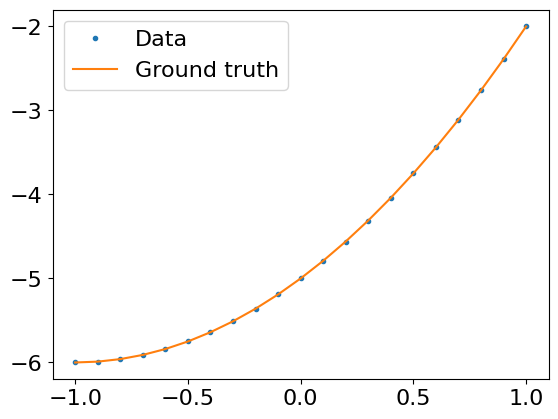

In [18]:
epochs=500
input_shape=(1,)
seed=42
n_points=21
x = tf.linspace(-1, 1, n_points)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + 0*tf.random.normal(shape=[n_points])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend()
x_=tf. expand_dims(x,-1)
y_=tf. expand_dims(y,-1)


In [4]:
def build_model_conv1D(input_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
 
    #kernel_regularizer=regularizers.L2(0.1)
    # Classifier
    x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
    x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
    x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
    output_layer = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanSquaredError(),optimizer=tfk.optimizers.Adam(0.001))

    # Return the model
    return model

In [5]:
model = build_model_conv1D(input_shape)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history=model.fit(
    x = x,
    y = y,
    epochs = epochs,
    batch_size=21
    ).history

Epoch 1/500
1/1 [==============================] - 1s 637ms/step - loss: 23.0643
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 22.9204
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 22.7824
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 22.6490
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 22.5178
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 22.3877
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 22.2612
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 22.1360
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 22.0058
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 21.8720
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 21.7348
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 21.5930
Epoch 13/500
1/1 [=============================

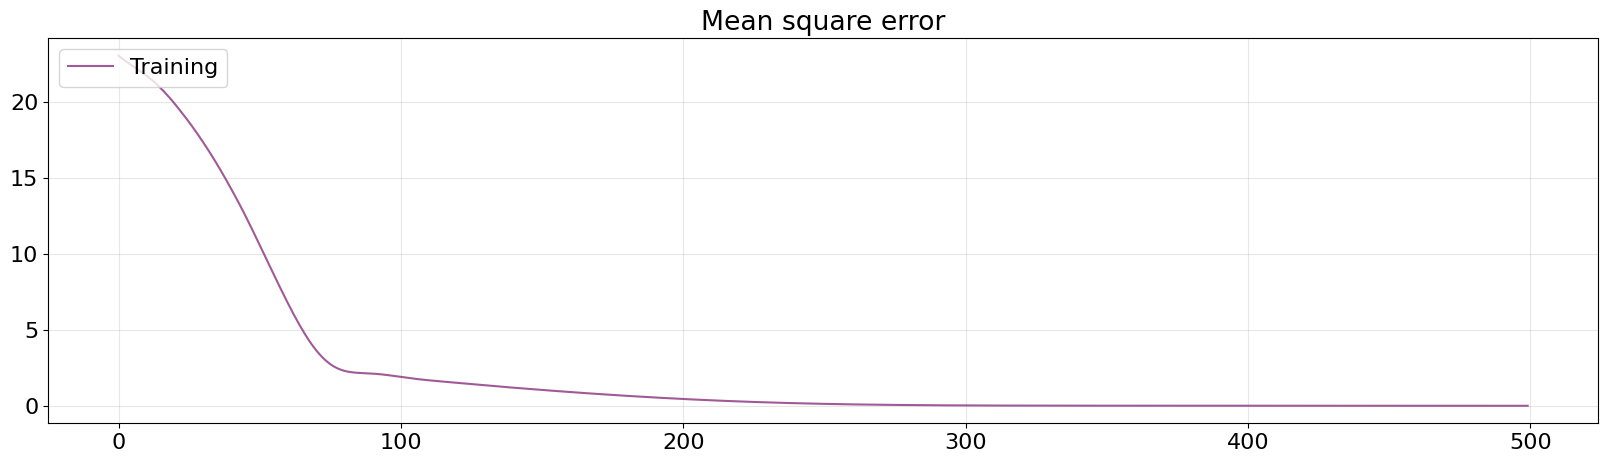

In [8]:
plt.figure(figsize=(20,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#8A307F', markersize=20)
plt.legend(loc='upper left')
plt.title('Mean square error')
plt.grid(alpha=.3)
plt.savefig('loss.png')

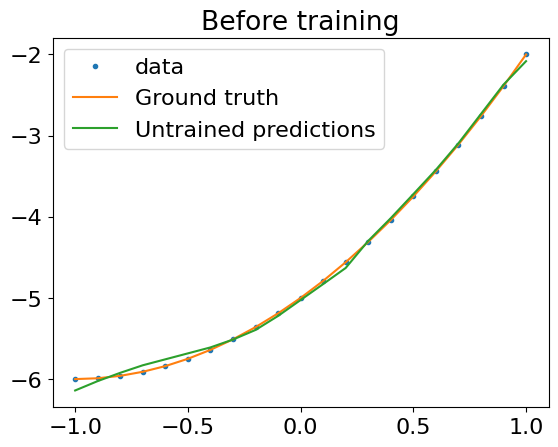

In [9]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [19]:
input_layer = tfkl.Input(shape=input_shape, name='Input')
x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
output_layer = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)


In [20]:
input_shape=(1,)
model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense_8 (Dense)             (None, 16)                32        
                                                                 
 dense_9 (Dense)             (None, 64)                1088      
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


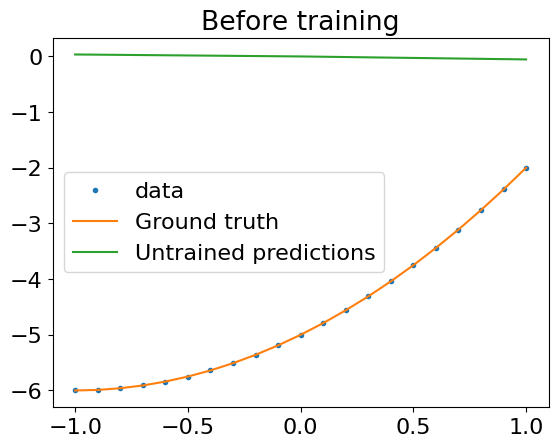

In [21]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [53]:
print(y)

tf.Tensor(
[-6.        -5.99      -5.96      -5.91      -5.84      -5.75
 -5.64      -5.51      -5.36      -5.19      -5.        -4.79
 -4.56      -4.31      -4.04      -3.75      -3.44      -3.1100001
 -2.76      -2.39      -2.       ], shape=(21,), dtype=float32)


In [26]:
epochs=1000
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        predictions = model(x,training=True)
        loss = tf.reduce_mean(tf.square(predictions-y))
    
    # Calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    
    # Update model weights
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # Print training loss for this epoch
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")


Epoch 10/1000, Loss: 1.574945092201233
Epoch 20/1000, Loss: 1.5735052824020386
Epoch 30/1000, Loss: 1.5736753940582275
Epoch 40/1000, Loss: 1.5735037326812744
Epoch 50/1000, Loss: 1.5735234022140503
Epoch 60/1000, Loss: 1.5735046863555908
Epoch 70/1000, Loss: 1.5734986066818237
Epoch 80/1000, Loss: 1.5734972953796387
Epoch 90/1000, Loss: 1.5734965801239014
Epoch 100/1000, Loss: 1.5734959840774536
Epoch 110/1000, Loss: 1.573495864868164
Epoch 120/1000, Loss: 1.573495626449585
Epoch 130/1000, Loss: 1.5734955072402954
Epoch 140/1000, Loss: 1.5734955072402954
Epoch 150/1000, Loss: 1.5734951496124268
Epoch 160/1000, Loss: 1.5734950304031372
Epoch 170/1000, Loss: 1.573494791984558
Epoch 180/1000, Loss: 1.573494791984558
Epoch 190/1000, Loss: 1.5734946727752686
Epoch 200/1000, Loss: 1.5734946727752686
Epoch 210/1000, Loss: 1.5734944343566895
Epoch 220/1000, Loss: 1.5734943151474
Epoch 230/1000, Loss: 1.5734943151474
Epoch 240/1000, Loss: 1.5734940767288208
Epoch 250/1000, Loss: 1.573494076728

KeyboardInterrupt: 

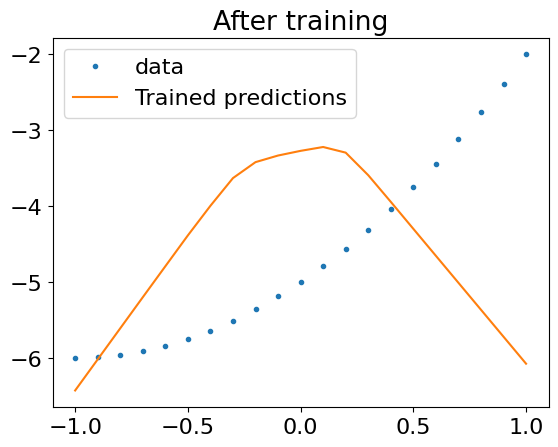

In [24]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, model(x), label='Trained predictions')
plt.title('After training')
plt.legend();